# Create Analytical Data
This notebook covers the loading of the various data collected in order to build a forecasting model for contraceptive medical products order in Cote d'Ivoire. The data is loaded into a postgres database. The data is then explored to determine how the data can be appropropriately merged to facilitate future analytical work including exploratory data analysis, model development and data visualization.

In [1]:
import os

import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
lc_data = pd.read_csv("final_data/contraceptive_logistics_data.csv")
lcd_date_dict = dict(year = lc_data.year,
                     month = lc_data.month,
                     day = [28]*len(lc_data))
lc_data['year_month']  = pd.to_datetime(lcd_date_dict)
lc_data.to_csv("lc_data.csv",index=False)
lc_data.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,year_month
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0,2019-01-28
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0,2019-01-28
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0,2019-01-28
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0,2019-01-28
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0,2019-01-28


In [4]:
ccm_data = pd.read_csv("final_data/contraceptive_case_data_monthly.csv")
ccm_date_dict = dict(year = ccm_data.year,
                     month = ccm_data.month,
                     day = [28]*len(ccm_data))
ccm_data['year_month']  = pd.to_datetime(ccm_date_dict)
ccm_data.to_csv("ccm_data.csv",index=False)
ccm_data.head()

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,...,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end,year_month
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,...,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0,2019-01-28
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,...,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0,2019-02-28
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,...,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0,2019-03-28
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,...,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0,2019-04-28
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,...,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0,2019-05-28


In [5]:
cca_data = pd.read_csv("final_data/contraceptive_case_data_annual.csv")
cca_data.head()

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,...,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,...,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,...,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,...,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,...,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,...,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [6]:
site_data = pd.read_csv("final_data/service_delivery_site_data.csv")
site_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [7]:
product_data = pd.read_csv("final_data/product.csv")
product_data.head()

,product_code,product_type,product_name
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE


In [8]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
def get_posgres_connection():
    db_name = os.getenv("PSQL_DB_NAME")
    db_user = os.getenv("PSQL_DB_USER")
    db_password = os.getenv("PSQL_DB_PASSWORD")
    db_host = os.getenv("PSQL_DB_HOST")
    sql_engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:5432/{db_name}')
    return sql_engine


In [10]:
?lc_data.to_sql

### Load data to the database 

In [11]:
# Create db engine
psql_engine = get_posgres_connection()

# ci_logistics_contraceptive_cases
lc_data.to_sql('ci_logistics_contraceptive_cases', psql_engine, index=False,if_exists='replace')

# ci_monthly_cases
ccm_data.to_sql('ci_monthly_cases', psql_engine, index=False,if_exists='replace')

# ci_annual_cases
cca_data.to_sql('ci_annual_cases', psql_engine, index=False,if_exists='replace')

# ci_med_products
product_data.to_sql('ci_med_products', psql_engine, index=False,if_exists='replace')

# ci_med_sites
site_data.to_sql('ci_med_sites', psql_engine, index=False,if_exists='replace')

ModuleNotFoundError: No module named 'psycopg2'

#### Load spatial data to the database

##### Get SRID

In [ ]:
from osgeo import ogr
driver = ogr.GetDriverByName('ESRI Shapefile')
shape = driver.Open('civ_admbnda_adm3_cntig_ocha_itos_20180706/civ_admbnda_adm3_cntig_ocha_itos_20180706.shp')
layer= shape.GetLayer()
# the crs
crs = layer.GetSpatialRef()

# from Geometry
feature = layer.GetNextFeature()
geom = feature.GetGeometryRef()
print(crs)

In [ ]:
# Imports
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *
import pandas as pd
import geopandas as gpd

In [ ]:
def load_shape_file_to_db(shape_file,table,engine,geom_type ='MULTIPOLYGON',if_exists ='replace',srid = 4326):
    """
    This function will load a shape file to a PostGIS database system.
    shape_file str: path to shapefile
    table str:name of database file to load to POSTGIS
    engine sqlalchemy.Engine: A sqlAlchemy POSTGIS Engine Object
    if_exists str: method of upload to database, default is "replace"
    srid int: format ID of shape files, this can be discovered by using the
    
    """
    # Load shape file with geopandas
    gdf = gpd.read_file(shape_file)

    #Convert geometry column to WKTElement
    gdf['geom'] = gdf['geometry'].apply(lambda x: WKTElement(x.wkt, srid= 4326))


    #drop the geometry column as it is now duplicative
    gdf.drop('geometry', 1, inplace=True)

    # Use 'dtype' to specify column's type
    # For the geom column, we will use GeoAlchemy's type 'Geometry'
    gdf.to_sql(table, engine, if_exists= if_exists, index=False, 
                             dtype={'geom': Geometry(geom_type, srid= 4326)})
    return None

In [ ]:
# district

#Establish a postgres connection
psql_engine = get_posgres_connection()


load_shape_file_to_db('civ_admbnda_adm3_cntig_ocha_itos_20180706/civ_admbnda_adm3_cntig_ocha_itos_20180706.shp',
                      "cdi_shp_adm3",
                      psql_engine,
                      geom_type="POLYGON")

In [ ]:
gdf = gpd.read_file('civ_admbnda_adm3_cntig_ocha_itos_20180706/civ_admbnda_adm3_cntig_ocha_itos_20180706.shp')

gdf.head()

###  Lets start exploring the data to make an analytical dataset

In [ ]:
districts = site_data['site_district'].unique()
print(len(districts))
districts.sort()
districts

In [ ]:
site_data.head()

'ABOBO-EST' is a neighborhood in Abidjan

Match city to district then aggregate the district level.

Need to do some manual analysis to figure this whole matching up.

In [ ]:
# Each city should be rolled-up into a district
region = gdf['ADM1_FR'].unique()
print(len(region))
region.sort()
region

In [ ]:
districts = gdf['ADM2_FR'].unique()
print(len(districts))
districts.sort()
districts

In [ ]:
site_data['site_code'].head()

In [ ]:
gdf['ADM2_PCODE'].head()

### The codes are not matching up between the two dataframes
- On inspection we can see there is an I missing, lets try tp add that and see if that fixes thing

In [ ]:
# Insert String
ins_char = lambda x: x[0:1]+"I"+x[1:]
site_data['ADM2_PCODE'] = site_data['site_code'].apply(ins_char)

In [ ]:
len(site_data)

In [ ]:
len(gdf)

#### Lets merge the two dataframes and see the overlap

In [ ]:
mgdf = gdf.merge(site_data, on = "ADM2_PCODE")
print( len(mgdf) )
mgdf.head()

#### Analysis
The dataframes are not able to merged. We would like to be able to do additional analysis on the sites based on their regional geographic characteristics but currently the data does not support their merging.

## Next Steps - Questions?
- How can we merge the data we have available into a single dataset?
- What transformations and processing stems should we make on the data prior to loading into our database?
- What analytical transformations on the data should we make prior to modeling of the data?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(__doc__)

n_neighbors = 3
random_state = 42

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

### Data treatment

In [63]:
len(ccm_data["district"].unique())
#.head()
ccm_data.columns

Index(['district', 'month', 'year', 'implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed',
       'iud_number_received', 'implant_number_received',
       'injection2_number_received', 'injection3_number_received',
       'pill_number_received', 'iud_stock_end', 'implant_stock_end',
       'injection2_stock_end', 'injection3_stock_end', 'pill_stock_end',
       'year_month'],
      dtype='object')

In [62]:
#lc_data.head()
lc_data.columns

Index(['year', 'month', 'region', 'district', 'site_code', 'product_code',
       'stock_initial', 'stock_received', 'stock_distributed',
       'stock_adjustment', 'stock_end', 'average_monthly_consumption',
       'stock_stockout_days', 'stock_ordered', 'year_month'],
      dtype='object')

In [117]:
# Either will drop 2019 or have to adjust it with the data we have for that year
by_district_lc_data = lc_data.copy()
lc_data_numeric = ["stock_received","stock_distributed","stock_adjustment",
    "average_monthly_consumption","stock_stockout_days"]#,"stock_change"]

by_district_lc_data['year'] = by_district_lc_data['year'].astype(str)
by_district_lc_data = by_district_lc_data[by_district_lc_data['year'] != "2019"]
agg_by_district_lc_data = by_district_lc_data.groupby(["region","district","year"])[lc_data_numeric].agg(['count','sum','mean','std'])
agg_by_district_lc_data = agg_by_district_lc_data.unstack()

agg_by_district_lc_data.columns = ['_'.join(col) for col in agg_by_district_lc_data.columns.values]
agg_by_district_lc_data.reset_index(inplace=True)
agg_by_district_lc_data.head()

,region,district,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,stock_received_sum_2018,stock_received_mean_2016,stock_received_mean_2017,...,stock_stockout_days_count_2018,stock_stockout_days_sum_2016,stock_stockout_days_sum_2017,stock_stockout_days_sum_2018,stock_stockout_days_mean_2016,stock_stockout_days_mean_2017,stock_stockout_days_mean_2018,stock_stockout_days_std_2016,stock_stockout_days_std_2017,stock_stockout_days_std_2018
0,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,370.0,375.0,510.0,6330.0,7123.0,8333.0,17.108108,18.994667,...,510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ABIDJAN 1-GRANDS PONTS,DABOU,91.0,84.0,84.0,9686.0,2660.0,3769.0,106.439560,31.666667,...,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABIDJAN 1-GRANDS PONTS,GRAND-LAHOU,39.0,81.0,75.0,230.0,610.0,950.0,5.897436,7.530864,...,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABIDJAN 1-GRANDS PONTS,JACQUEVILLE,70.0,84.0,84.0,685.0,1374.0,841.0,9.785714,16.357143,...,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABIDJAN 1-GRANDS PONTS,YOPOUGON-EST,205.0,193.0,243.0,4505.0,4758.0,4443.0,21.975610,24.652850,...,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#agg_by_district_lc_data.sort_values("district")
len(agg_by_district_lc_data["region"].unique())

20

In [120]:
#product_df = pd.merge(product_data,agg_product_lc_data,on='product_code')
#product_df.head()
#agg_by_district_lc_data.iloc[:,2:]

## Dimentionality reduction

In [121]:
from sklearn.preprocessing import StandardScaler

# Select which features as numeric
agg_by_district_lc_data_numerics = agg_by_district_lc_data.iloc[:,2:]
# Standardizing the features
standardized_district_df = StandardScaler().fit_transform(agg_by_district_lc_data_numerics)
standardized_district_df = pd.DataFrame(standardized_district_df)
standardized_district_df.columns = agg_by_district_lc_data_numerics.columns.values

In [75]:
import seaborn as sns

In [78]:
import matplotlib.pyplot as plt

In [122]:
standardized_district_df

,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,stock_received_sum_2018,stock_received_mean_2016,stock_received_mean_2017,stock_received_mean_2018,stock_received_std_2016,...,stock_stockout_days_count_2018,stock_stockout_days_sum_2016,stock_stockout_days_sum_2017,stock_stockout_days_sum_2018,stock_stockout_days_mean_2016,stock_stockout_days_mean_2017,stock_stockout_days_mean_2018,stock_stockout_days_std_2016,stock_stockout_days_std_2017,stock_stockout_days_std_2018
0,2.743427,2.207696,3.027719,1.933794,2.017346,3.048079,0.052145,0.439368,0.447658,-0.063326,...,3.027719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.167786,-0.408633,-0.457307,3.359914,0.292517,0.921339,4.861671,1.516893,3.695240,3.349514,...,-0.457307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.710378,-0.435605,-0.530935,-0.658378,-0.499753,-0.392263,-0.551427,-0.535421,0.029608,-0.693010,...,-0.530935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.386910,-0.408633,-0.457307,-0.465027,-0.204488,-0.443055,-0.342086,0.215094,-0.272586,-0.397679,...,-0.457307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.021742,0.571367,0.843442,1.158267,1.103337,1.235410,0.314207,0.920494,0.669030,0.834448,...,0.843442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.501689,-0.417624,-0.555477,-0.619283,-0.529125,-0.613605,-0.575106,-0.628712,-0.661283,-0.614299,...,-0.555477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,NaN,-0.822211,-0.629105,NaN,-0.328932,-0.255265,NaN,1.178257,0.835460,NaN,...,-0.629105,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
77,-0.397344,-0.399642,-0.457307,-0.609934,-0.367579,-0.381080,-0.600525,-0.223428,-0.092354,-0.539295,...,-0.457307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,-0.366041,-0.246798,-0.359138,0.149020,-0.335889,-0.357781,0.723800,-0.313795,-0.198054,1.317551,...,-0.359138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


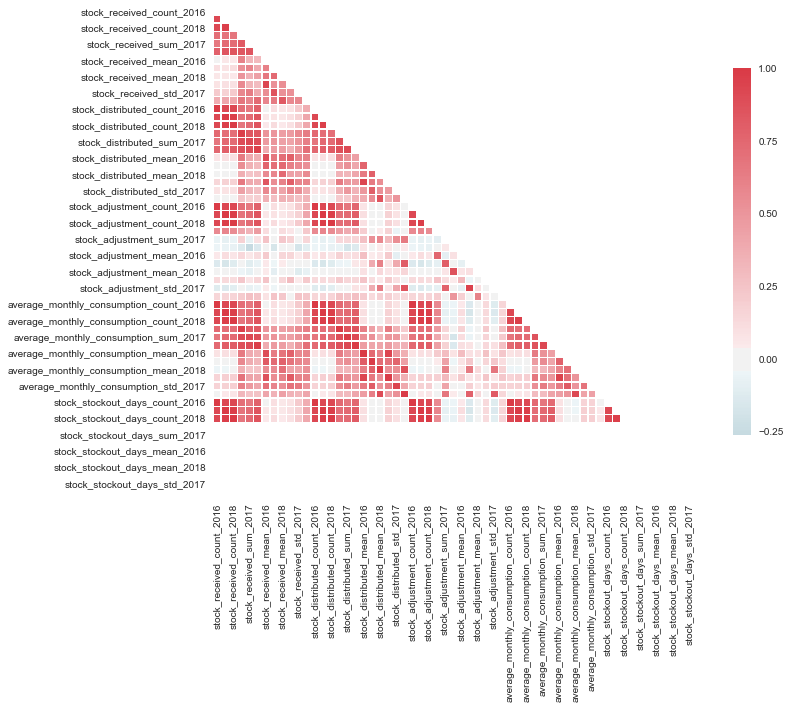

In [123]:
# Compute the correlation matrix
# log transform metrics for analysis
#corr = np.log(standardized_product_df+0.01).corr()
corr = standardized_district_df.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

In [124]:
standardized_district_df = standardized_district_df.fillna(0)

In [125]:
from sklearn.decomposition import PCA
n_components = 10 #len(standardized_district_df) -1
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(standardized_district_df)
principalDf = pd.DataFrame(data = principalComponents , columns = ["comp_"+str(x) for x in  range(n_components)])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


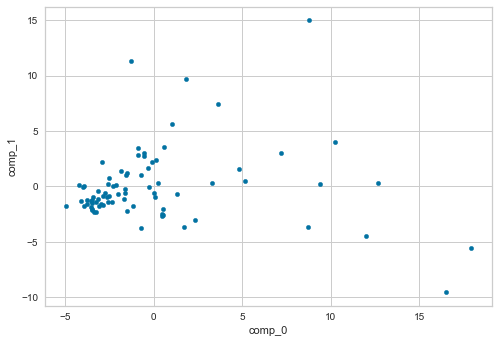

In [126]:
principalDf.plot.scatter(x="comp_0",y="comp_1")

In [127]:
pca_district_df = pd.concat([agg_by_district_lc_data,principalDf],axis=1)

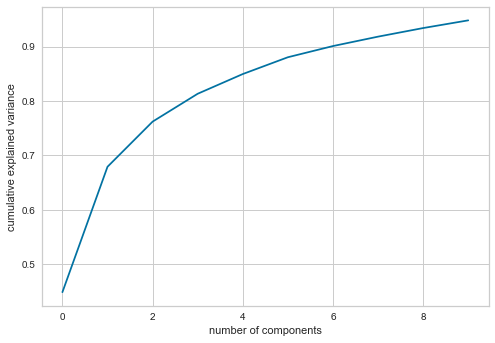

In [128]:
# How much of the variance is explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

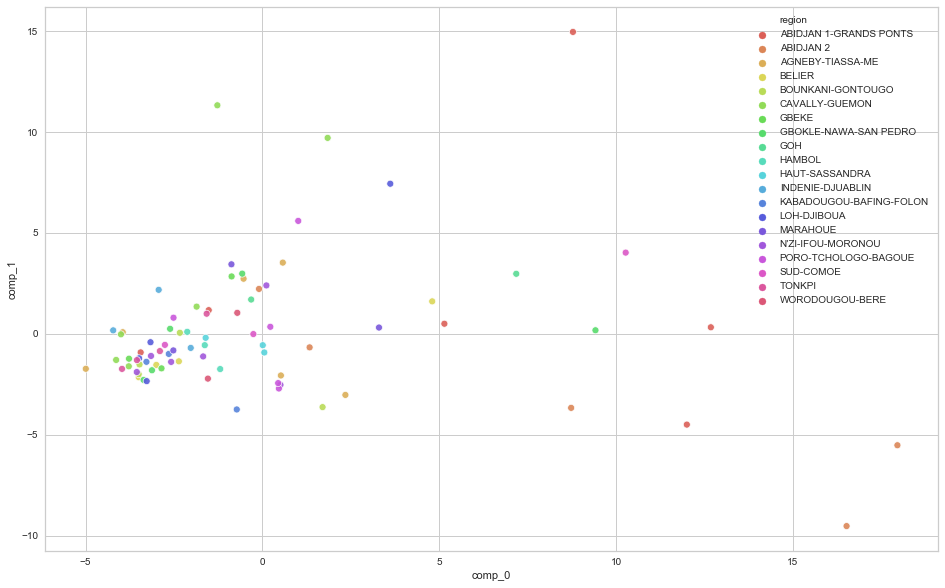

In [136]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp_0", y="comp_1",
    hue="region",
    palette=sns.color_palette("hls", 20),
    data=pca_district_df,
    legend="full",
    alpha=0.9
)

In [129]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(standardized_district_df)
pca_district_df['tsne_1']= tsne_results[:,0]
pca_district_df['tsne_2'] = tsne_results[:,1]

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 3.227558
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.066483
[t-SNE] KL divergence after 300 iterations: 1.164847


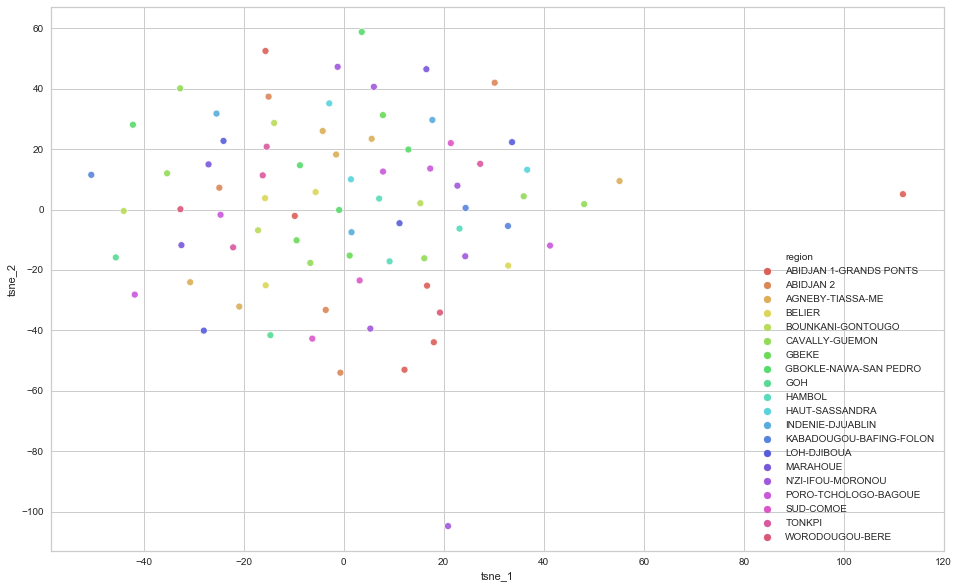

In [135]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="region",
    palette=sns.color_palette("hls", 20),
    data=pca_district_df,
    legend="full",
    alpha=0.9
)

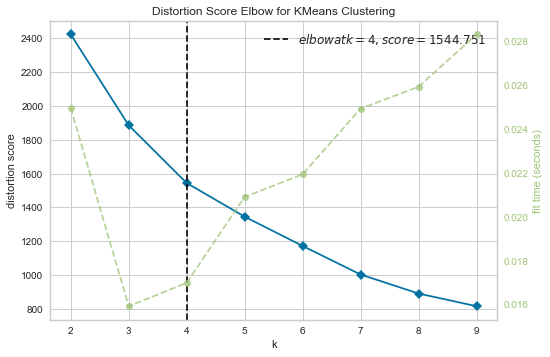

C:\Users\Guest_Sante\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000010F1D440128>,
                 k=None, model=None)

In [130]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer


# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), principalComponents, k=(2,10))

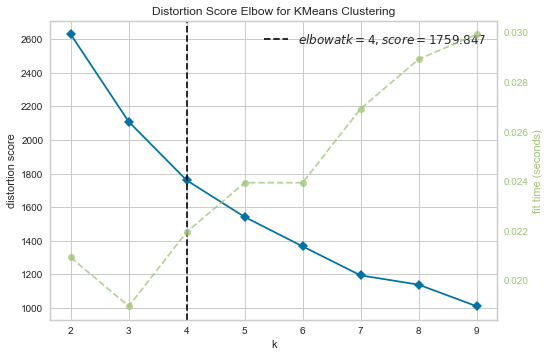

C:\Users\Guest_Sante\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000010F1D4A1438>,
                 k=None, model=None)

In [131]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer


# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), standardized_district_df, k=(2,10))